# Eric Yarger, Multiple Regression of Medical Dataset

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats
from scipy.stats import zscore

In [2]:
# Read in medical_clean datafile
df = pd.read_csv('C:/Users/ericy/Desktop/medical_clean.csv')

## Environment Details

In [3]:
# Jupyter environment version
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.0.3
qtconsole        : 4.7.2
ipython          : 7.13.0
ipykernel        : 5.1.4
jupyter client   : 6.1.2
jupyter lab      : 1.2.6
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.4
traitlets        : 4.3.3


In [4]:
# Python Environment version
import platform
print(platform.python_version())

3.7.7


## Cleaning and Preparation
#### Initial Feature Selection
#### Outliers with Zscore
#### Necessary feature renaming
#### Dummy Varibles, k-1 number of variables
#### Univariate & Bivariate Visualization to check for normality
#### Heatmaps for correlation visualization
#### Statistical initial feature selection >.02 correlation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [6]:
#Rename columns for dataset cohesiveness and readability
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat','Item3':'Timely_vis','Item4':'Reliability','Item5':'Options','Item6':'Hours','Item7':'Courteous','Item8':'Listen'},inplace=True)

In [7]:
#Z-score before boxplots and histograms

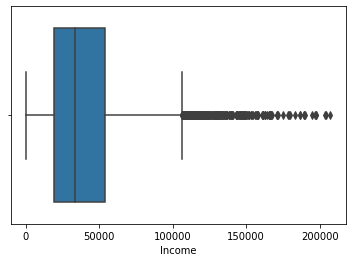

In [8]:
sns.boxplot(df['Income'])

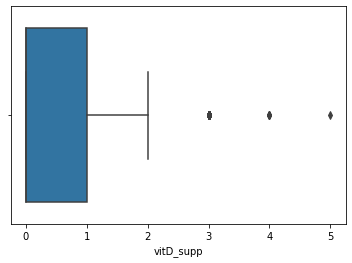

In [9]:
sns.boxplot(df['vitD_supp'])

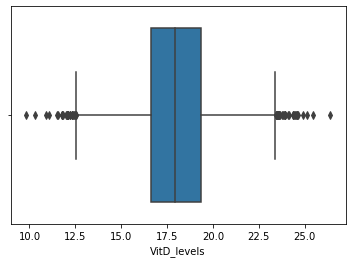

In [10]:
sns.boxplot(df['VitD_levels'])

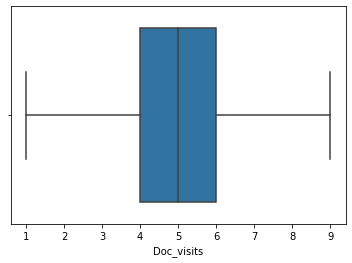

In [11]:
sns.boxplot(df['Doc_visits'])

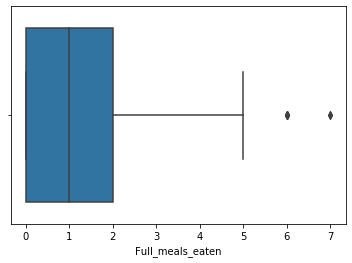

In [12]:
sns.boxplot(df['Full_meals_eaten'])

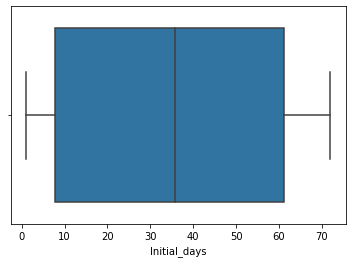

In [13]:
sns.boxplot(df['Initial_days'])

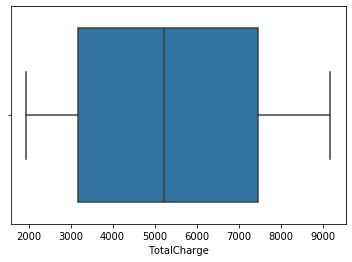

In [14]:
sns.boxplot(df['TotalCharge'])

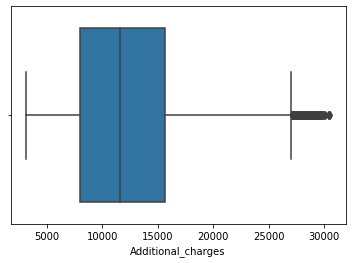

In [15]:
sns.boxplot(df['Additional_charges'])

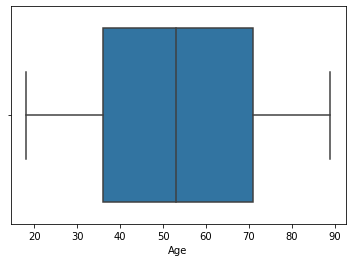

In [16]:
sns.boxplot(df['Age'])

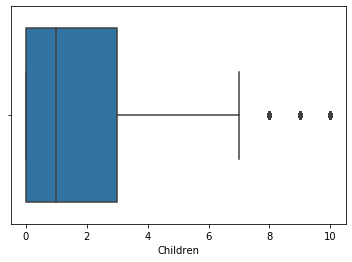

In [17]:
sns.boxplot(df['Children'])

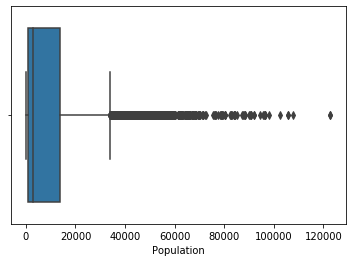

In [18]:
sns.boxplot(df['Population'])

## Z-score calculation and removal of cases >3
### Code reference (Bushmanov, 2019)

In [19]:

num_data = df.select_dtypes(include=['number'])
cat_data = df.select_dtypes(exclude=['number'])

In [20]:
idx = np.all(stats.zscore(num_data) <3, axis=1)

In [21]:
df = pd.concat([num_data.loc[idx], cat_data.loc[idx]], axis=1)

In [22]:
#Z-score after boxplots and histograms

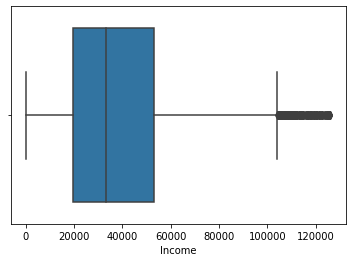

In [23]:
sns.boxplot(df['Income'])

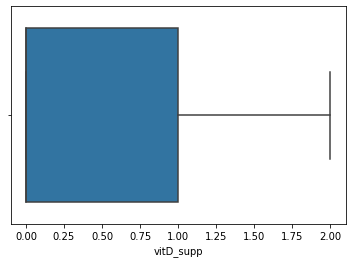

In [24]:
sns.boxplot(df['vitD_supp'])

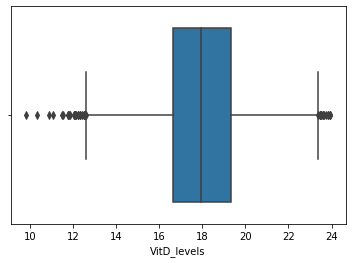

In [25]:
sns.boxplot(df['VitD_levels'])

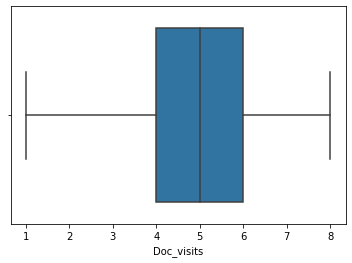

In [26]:
sns.boxplot(df['Doc_visits'])

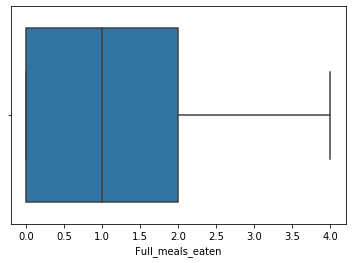

In [27]:
sns.boxplot(df['Full_meals_eaten'])

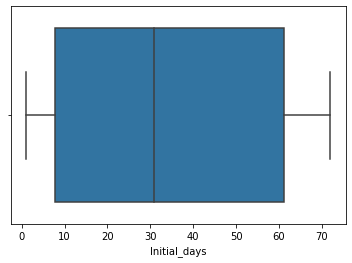

In [28]:
sns.boxplot(df['Initial_days'])

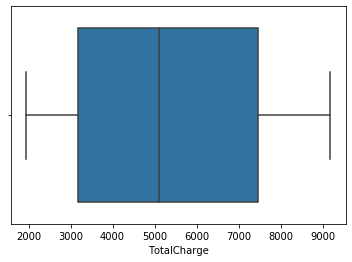

In [29]:
sns.boxplot(df['TotalCharge'])

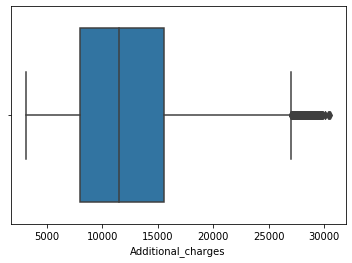

In [30]:
sns.boxplot(df['Additional_charges'])

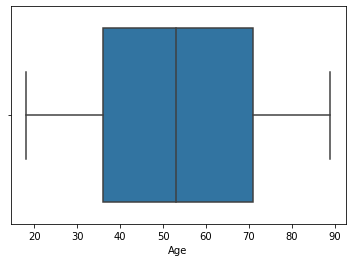

In [31]:
sns.boxplot(df['Age'])

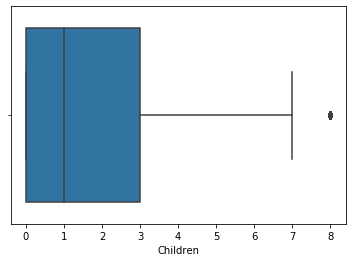

In [32]:
sns.boxplot(df['Children'])

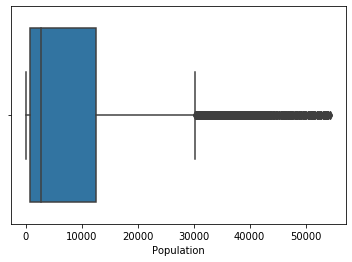

In [33]:
sns.boxplot(df['Population'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9206 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           9206 non-null   int64  
 1   Zip                 9206 non-null   int64  
 2   Lat                 9206 non-null   float64
 3   Lng                 9206 non-null   float64
 4   Population          9206 non-null   int64  
 5   Children            9206 non-null   int64  
 6   Age                 9206 non-null   int64  
 7   Income              9206 non-null   float64
 8   VitD_levels         9206 non-null   float64
 9   Doc_visits          9206 non-null   int64  
 10  Full_meals_eaten    9206 non-null   int64  
 11  vitD_supp           9206 non-null   int64  
 12  Initial_days        9206 non-null   float64
 13  TotalCharge         9206 non-null   float64
 14  Additional_charges  9206 non-null   float64
 15  Timely_admis        9206 non-null   int64  
 16  Timely

## Univariate Visualization
### Histograms to look at
### Feature Distribution and Normality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EA64AD488>,
      dtype=object)

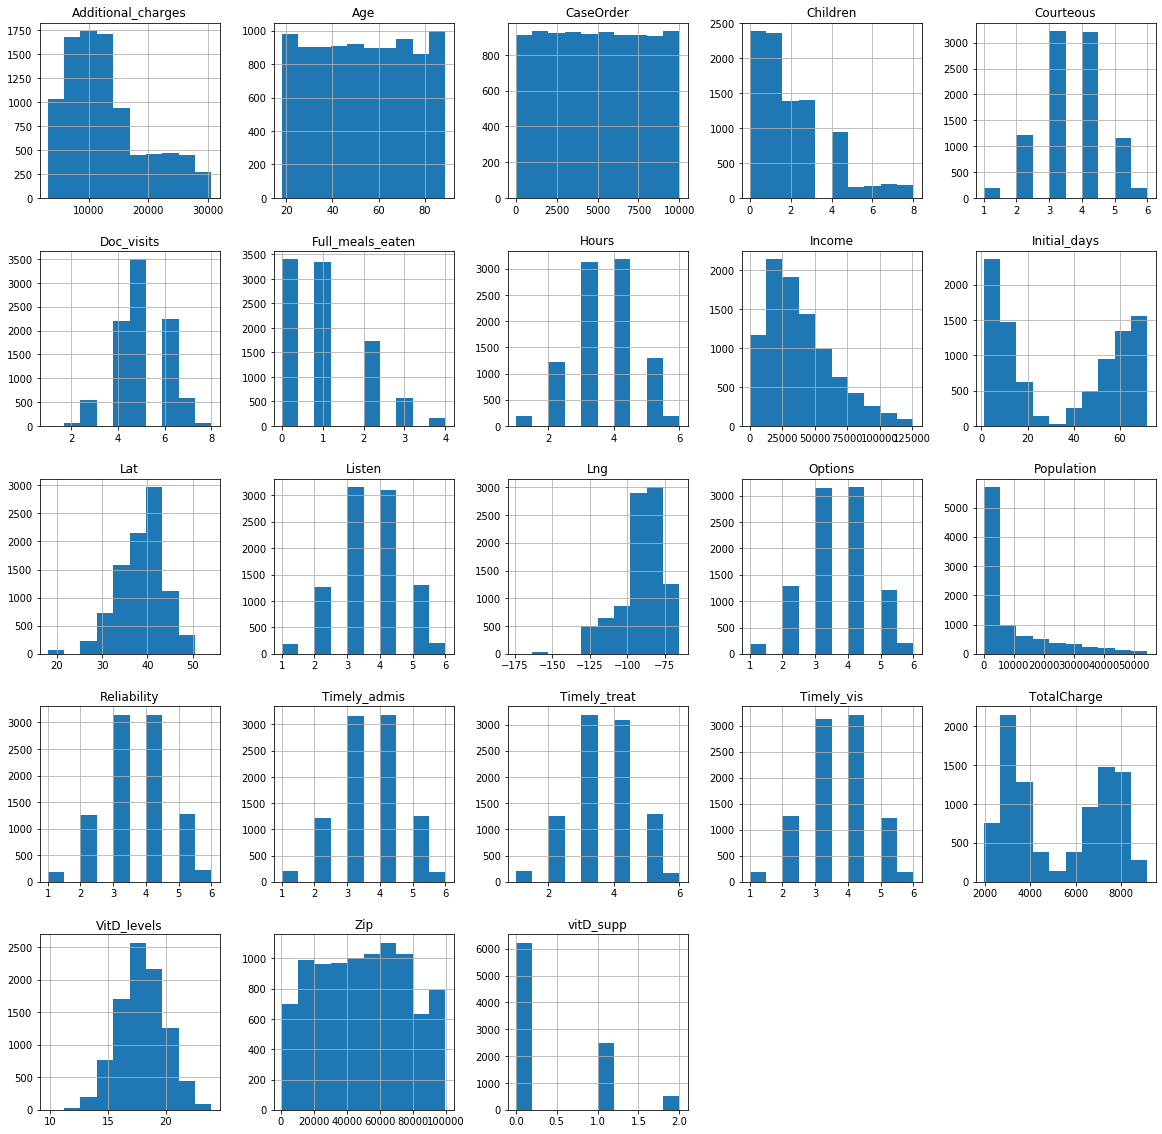

In [35]:
df.hist(figsize=(20,20))

## Bivariate Visualization
### Scatterplots with 
#### X-Axis = Additional_charges
#### Y-Axis = Independent feature

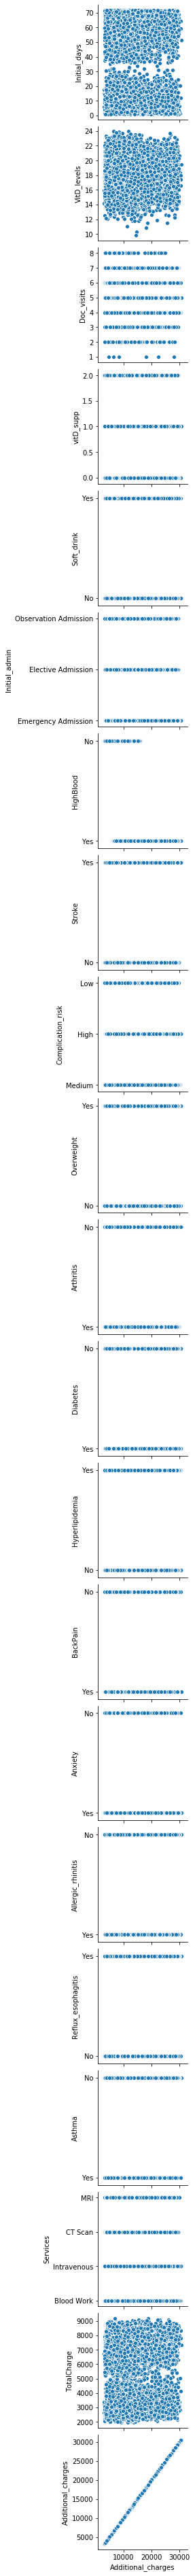

In [36]:
sns.pairplot(df, x_vars=['Additional_charges'], y_vars=['Initial_days','VitD_levels','Doc_visits','vitD_supp','Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services','TotalCharge','Additional_charges'])

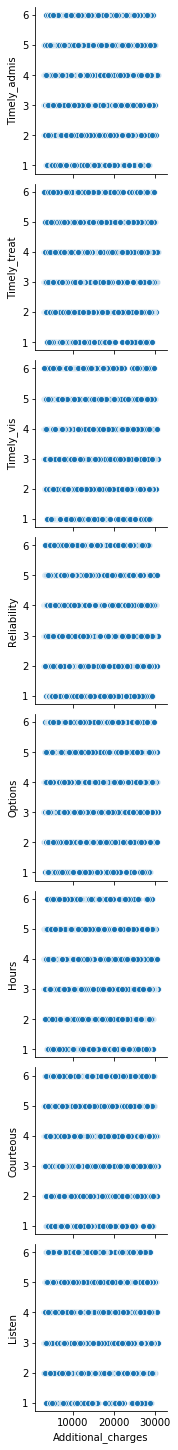

In [37]:
sns.pairplot(df, x_vars=['Additional_charges'], y_vars=['Timely_admis','Timely_treat','Timely_vis','Reliability','Options','Hours','Courteous','Listen'])

## Dummy variables 
### Drop_first parameter set to True, 
### ensuring k-1 features to avoid multicollinearity issues  
### Rename necessary variables
### Code Reference (Pandas.get_dummies, n.d.)

In [38]:
#Get dummies for categorical features, 
#scroll to show drop_first=True at end in Panopto
df = pd.get_dummies(df, columns=['Area','Marital','Gender','Doc_visits','vitD_supp','ReAdmis','Soft_drink','Initial_admin','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','Services'], drop_first=True)

In [39]:
df = pd.get_dummies(df, columns=['Timely_admis','Timely_treat','Timely_vis','Reliability','Options','Hours','Courteous','Listen'],drop_first=True)

In [40]:
#Rename features with spaces in name for future analysis
df.rename(columns={'Marital_Never Married':'Marital_Never_Married','Initial_admin_Emergency Admission':'Initial_admin_Emergency_Admission','Initial_admin_Observation Admission':'Initial_admin_Observation_Admission'},inplace=True)

## Look at data set size and
## Variable correlation

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9206 entries, 0 to 9999
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            9206 non-null   int64  
 1   Zip                                  9206 non-null   int64  
 2   Lat                                  9206 non-null   float64
 3   Lng                                  9206 non-null   float64
 4   Population                           9206 non-null   int64  
 5   Children                             9206 non-null   int64  
 6   Age                                  9206 non-null   int64  
 7   Income                               9206 non-null   float64
 8   VitD_levels                          9206 non-null   float64
 9   Full_meals_eaten                     9206 non-null   int64  
 10  Initial_days                         9206 non-null   float64
 11  TotalCharge                   

In [42]:
df.corr() 

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Full_meals_eaten,...,Courteous_2,Courteous_3,Courteous_4,Courteous_5,Courteous_6,Listen_2,Listen_3,Listen_4,Listen_5,Listen_6
CaseOrder,1.000000,0.010465,-0.012946,-0.012081,0.001489,0.017027,-0.003011,-0.012265,-0.015026,-0.020805,...,0.000618,0.000542,-0.008179,0.003586,0.016038,0.006526,0.002207,-0.001205,-0.003449,-0.014306
Zip,0.010465,1.000000,-0.084258,-0.913573,0.012947,0.014307,-0.003327,0.010507,-0.010747,0.013077,...,0.018549,-0.003091,-0.015291,0.006999,0.007002,0.009945,-0.003263,0.016042,-0.021017,-0.005841
Lat,-0.012946,-0.084258,1.000000,0.001062,-0.187334,0.005874,-0.000132,-0.015414,-0.005158,-0.001353,...,0.001460,0.001343,-0.011794,0.012055,0.011587,-0.006435,0.008912,-0.012675,0.001714,0.018726
Lng,-0.012081,-0.913573,0.001062,1.000000,-0.018263,-0.014141,0.002780,-0.008175,0.000931,-0.013120,...,-0.014676,0.002052,0.016632,-0.010898,-0.005874,-0.003020,0.005719,-0.021459,0.017698,0.007310
Population,0.001489,0.012947,-0.187334,-0.018263,1.000000,0.007810,-0.018884,0.002162,0.004719,-0.025711,...,-0.010333,-0.007661,0.009311,0.006225,-0.000205,0.013885,-0.006724,0.003848,-0.001610,-0.009906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Listen_2,0.006526,0.009945,-0.006435,-0.003020,0.013885,0.008641,0.002051,-0.012318,0.014576,0.014706,...,0.117079,0.036183,-0.071218,-0.080946,-0.046474,1.000000,-0.288408,-0.283696,-0.161483,-0.060234
Listen_3,0.002207,-0.003263,0.008912,0.005719,-0.006724,0.006598,-0.006864,-0.014727,0.010725,0.003840,...,0.054921,0.052929,-0.031112,-0.069685,-0.039622,-0.288408,1.000000,-0.513624,-0.292361,-0.109052
Listen_4,-0.001205,0.016042,-0.012675,-0.021459,0.003848,-0.022668,-0.003206,0.028375,0.001107,0.000904,...,-0.091834,-0.028354,0.059343,0.056898,0.009592,-0.283696,-0.513624,1.000000,-0.287584,-0.107270
Listen_5,-0.003449,-0.021017,0.001714,0.017698,-0.001610,0.008179,0.006968,0.005117,-0.021362,-0.015708,...,-0.077357,-0.054875,0.038701,0.090936,0.069702,-0.161483,-0.292361,-0.287584,1.000000,-0.061059


## Heatmaps for correlation visualization
### Code reference (seaborn.heatmap, n.d.)

CaseOrder     0.003178
Zip           0.001545
Lat           0.001433
Lng           0.003290
Population    0.011835
                ...   
Listen_2      0.002972
Listen_3      0.001072
Listen_4      0.000247
Listen_5      0.009820
Listen_6      0.006197
Name: Additional_charges, Length: 90, dtype: float64

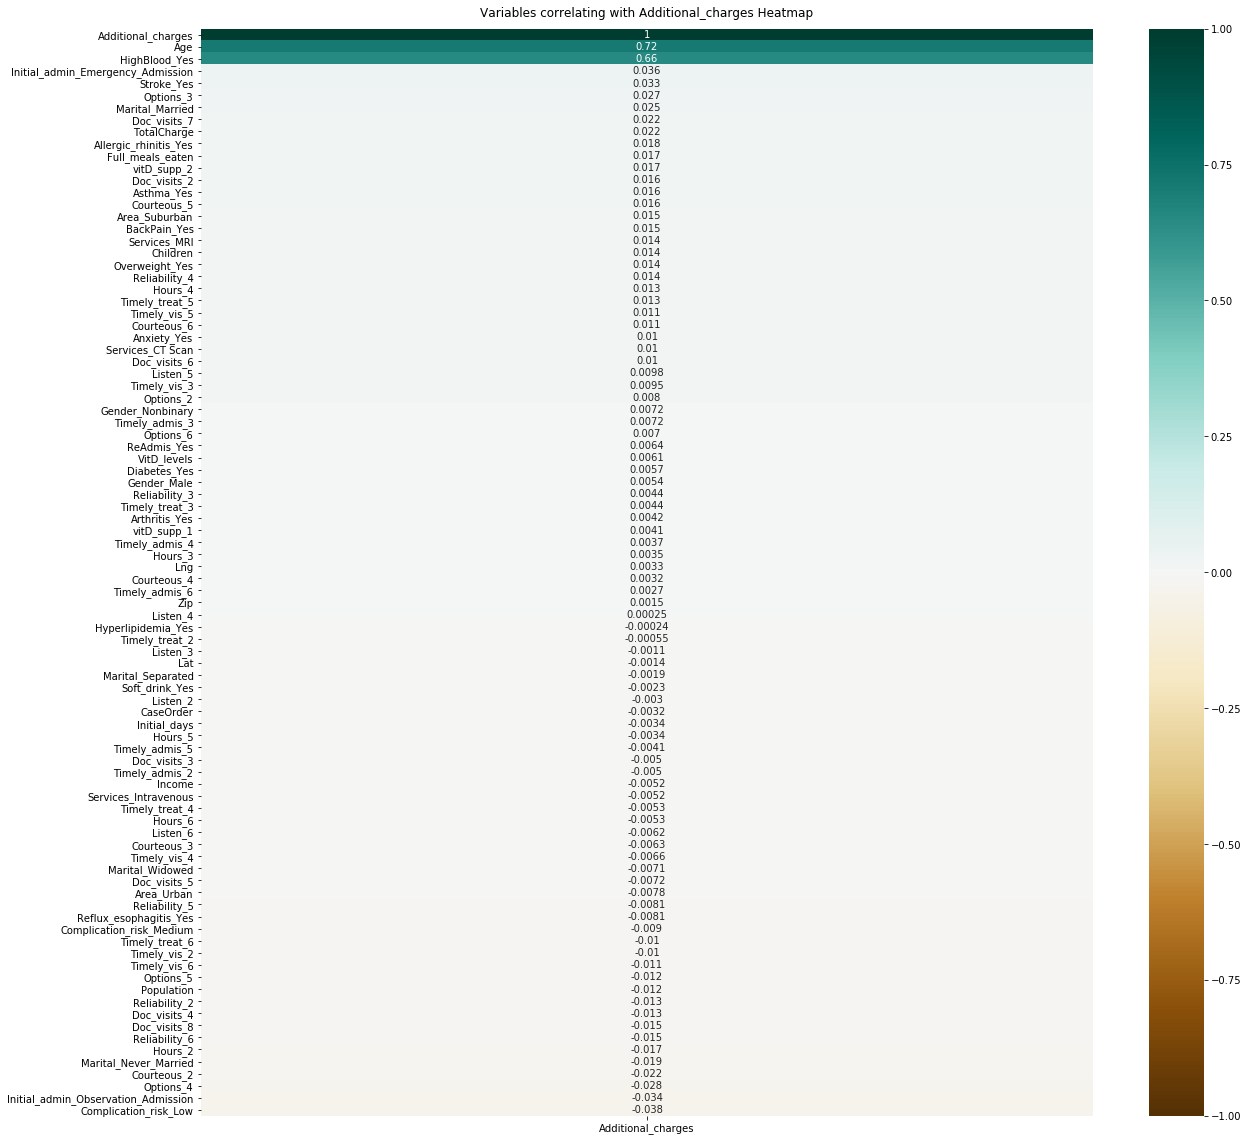

In [43]:
import matplotlib
matplotlib.pyplot.figure(figsize=(20,20))
heatmap = sns.heatmap(df.corr()[['Additional_charges']].sort_values(by='Additional_charges', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables correlating with Additional_charges Heatmap',pad=12)

abs(df.corr()['Additional_charges'])

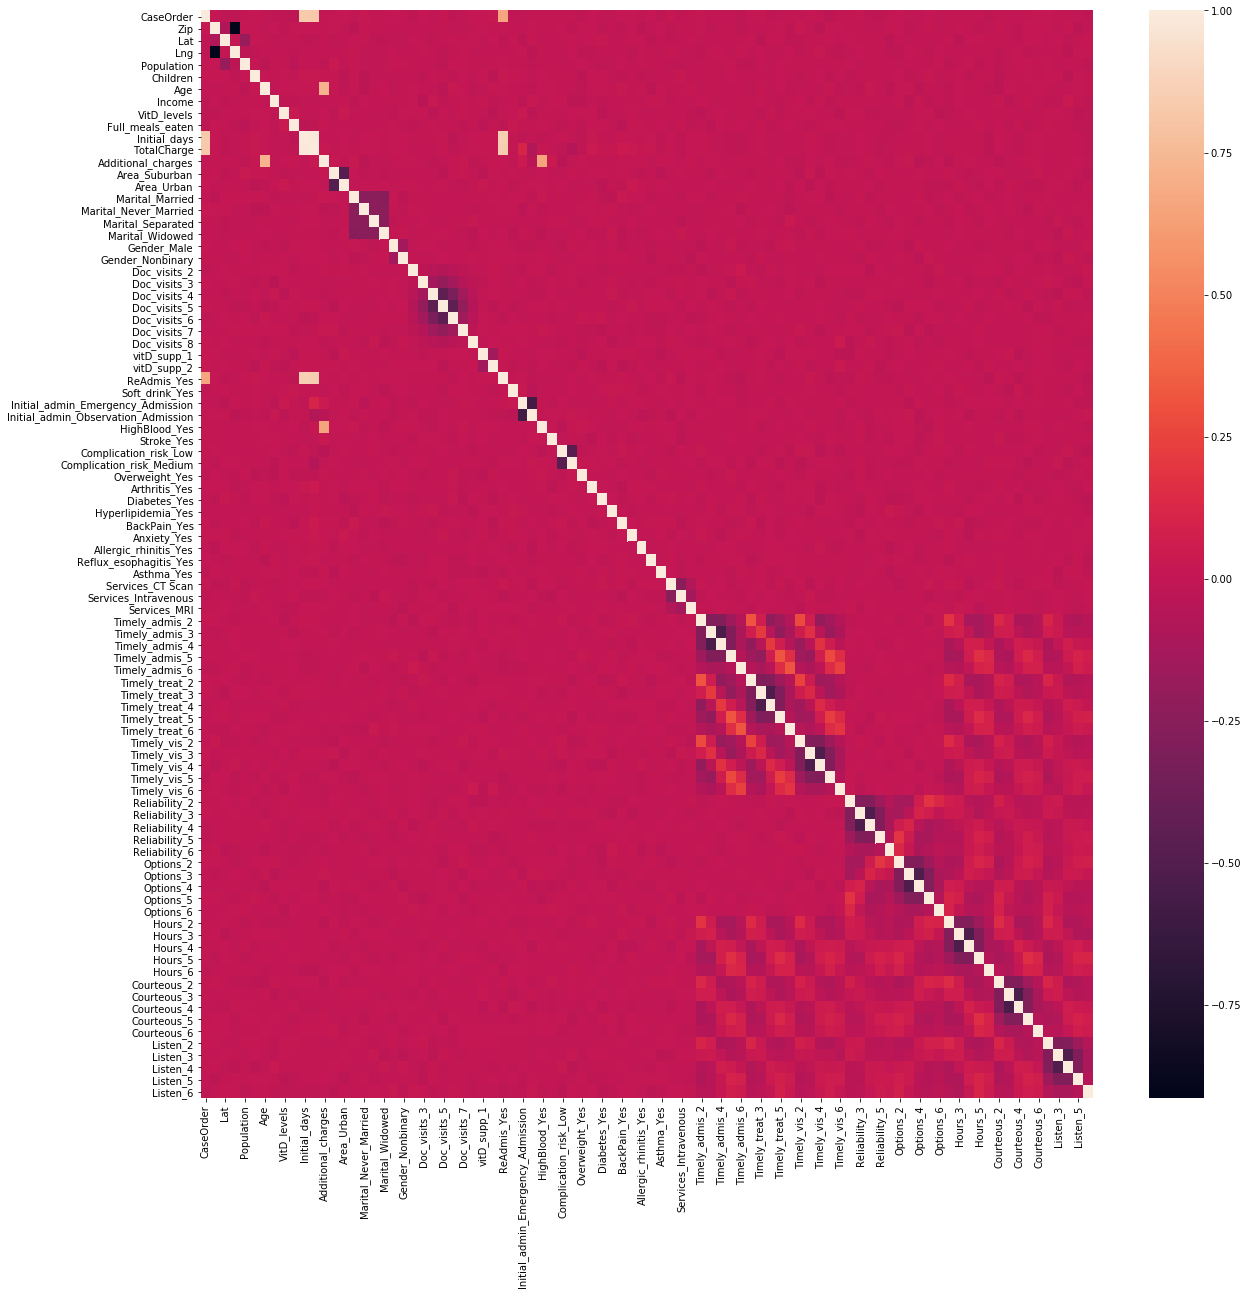

In [44]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), ax=ax)
plt.show()

# C2 Summary Statistics

In [45]:
dfc = df[['Additional_charges','Age','TotalCharge','Marital_Married','Doc_visits_7','Initial_admin_Emergency_Admission','Initial_admin_Observation_Admission','HighBlood_Yes','Stroke_Yes','Complication_risk_Low','Options_3','Options_4','Courteous_2']]

In [46]:
dfc.describe()

,Additional_charges,Age,TotalCharge,Marital_Married,Doc_visits_7,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,HighBlood_Yes,Stroke_Yes,Complication_risk_Low,Options_3,Options_4,Courteous_2
count,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000,9206.000000
mean,12927.980718,53.543124,5306.435876,0.203889,0.063871,0.505323,0.244189,0.407886,0.199001,0.212036,0.341408,0.344123,0.132848
std,6540.592828,20.609439,2181.251460,0.402909,0.244537,0.499999,0.429628,0.491468,0.399270,0.408772,0.474208,0.475107,0.339429
min,3125.703000,18.000000,1938.312067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7991.171750,36.000000,3178.291852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11556.775000,53.000000,5100.260500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15602.158960,71.000000,7458.542500,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,30566.070000,89.000000,9180.728000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
dfc.corr()

,Additional_charges,Age,TotalCharge,Marital_Married,Doc_visits_7,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,HighBlood_Yes,Stroke_Yes,Complication_risk_Low,Options_3,Options_4,Courteous_2
Additional_charges,1.000000,0.716409,0.022020,0.025245,0.022486,0.036228,-0.034389,0.655680,0.033301,-0.038131,0.026605,-0.027679,-0.022164
Age,0.716409,1.000000,0.010785,0.012580,0.005877,-0.004498,-0.010404,0.008265,0.011657,0.000604,0.014939,-0.019079,-0.023345
TotalCharge,0.022020,0.010785,1.000000,0.000992,-0.000072,0.107284,-0.069032,0.015240,-0.007641,-0.014872,-0.001122,0.000477,0.006867
Marital_Married,0.025245,0.012580,0.000992,1.000000,0.005638,0.016453,-0.012139,0.022163,-0.006432,-0.001313,-0.006154,0.013666,-0.008226
Doc_visits_7,0.022486,0.005877,-0.000072,0.005638,1.000000,0.015878,0.000431,0.026361,0.012226,-0.005083,-0.019437,0.010899,-0.006694
Initial_admin_Emergency_Admission,0.036228,-0.004498,0.107284,0.016453,0.015878,1.000000,-0.574486,0.000227,-0.014557,0.007766,-0.017974,0.019728,0.009596
Initial_admin_Observation_Admission,-0.034389,-0.010404,-0.069032,-0.012139,0.000431,-0.574486,1.000000,0.000037,0.008009,-0.001024,0.022137,-0.027989,-0.012398
HighBlood_Yes,0.655680,0.008265,0.015240,0.022163,0.026361,0.000227,0.000037,1.000000,0.005953,-0.031468,0.013524,-0.015439,-0.008365
Stroke_Yes,0.033301,0.011657,-0.007641,-0.006432,0.012226,-0.014557,0.008009,0.005953,1.000000,-0.006955,0.006622,-0.016857,0.024547
Complication_risk_Low,-0.038131,0.000604,-0.014872,-0.001313,-0.005083,0.007766,-0.001024,-0.031468,-0.006955,1.000000,-0.001921,-0.009917,0.005231


In [48]:
dfc.mean()

Additional_charges                     12927.980718
Age                                       53.543124
TotalCharge                             5306.435876
Marital_Married                            0.203889
Doc_visits_7                               0.063871
Initial_admin_Emergency_Admission          0.505323
Initial_admin_Observation_Admission        0.244189
HighBlood_Yes                              0.407886
Stroke_Yes                                 0.199001
Complication_risk_Low                      0.212036
Options_3                                  0.341408
Options_4                                  0.344123
Courteous_2                                0.132848
dtype: float64

In [49]:
dfc.median()

Additional_charges                     11556.7750
Age                                       53.0000
TotalCharge                             5100.2605
Marital_Married                            0.0000
Doc_visits_7                               0.0000
Initial_admin_Emergency_Admission          1.0000
Initial_admin_Observation_Admission        0.0000
HighBlood_Yes                              0.0000
Stroke_Yes                                 0.0000
Complication_risk_Low                      0.0000
Options_3                                  0.0000
Options_4                                  0.0000
Courteous_2                                0.0000
dtype: float64

In [50]:
df.to_excel('C:/Users/ericy/Desktop/D208_all_variables.xlsx', index=False)

## Statistical Feature Selection
## Correlation > .02
### Casts a wide net for initial feature selection

In [51]:
abs(df.corr()["Additional_charges"][abs(df.corr()["Additional_charges"])>0.02].drop('Additional_charges')).index.tolist()

['Age',
 'TotalCharge',
 'Marital_Married',
 'Doc_visits_7',
 'Initial_admin_Emergency_Admission',
 'Initial_admin_Observation_Admission',
 'HighBlood_Yes',
 'Stroke_Yes',
 'Complication_risk_Low',
 'Options_3',
 'Options_4',
 'Courteous_2']

In [52]:
df.to_excel('C:/Users/ericy/Desktop/D208_clean.xlsx', index=False)

## Initial Multiple Regression
### Using Ordinary Least Squared (OLS) Regression
### Code Reference ("Ordinary Least Squares (OLS) using statsmodels", 2022)

In [53]:
X=df[['Age','TotalCharge','Marital_Married','Doc_visits_7','Initial_admin_Emergency_Admission','Initial_admin_Observation_Admission','HighBlood_Yes','Stroke_Yes','Complication_risk_Low','Options_3','Options_4','Courteous_2']]
y=df['Additional_charges']

In [54]:
import statsmodels.api as sm

X= sm.add_constant(X)

In [55]:
ols = sm.OLS(y, X).fit()

In [56]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.157e+04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:50:14   Log-Likelihood:                -81153.
No. Observations:                9206   AIC:                         1.623e+05
Df Residuals:                    9193   BIC:                         1.624e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## Additional_charges = -2927.6667 +Age(225.5595)+TotalCharge(.0001)+Marital_Married(22.9864)+Initial_admin_Emergency_Admission(470.9664)-Initial_admin_Observation_Admission(102.0149)+HighBlood_Yes(8636.1851)+Stroke_Yes(353.0603)-Complication_risk_Low(292.2519)+Options_3(100.4664)-Options_4(14.0420)-Courteous_2(7.7094)

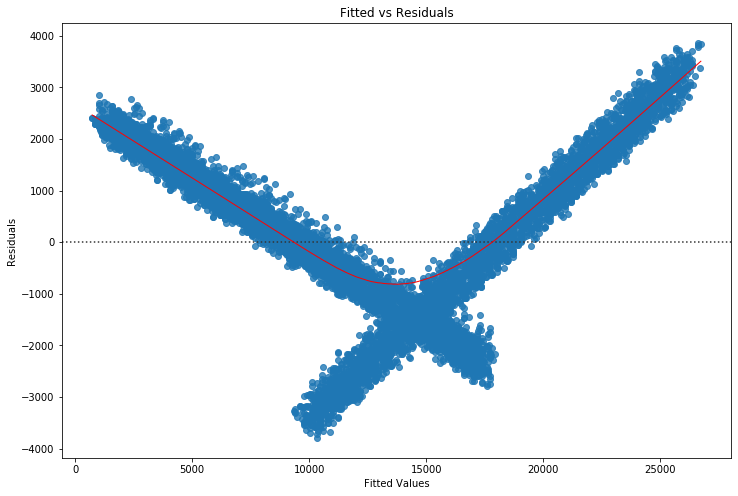

In [57]:
plt.figure(figsize=(12,8))
plt.title('Fitted vs Residuals')
sns.residplot(ols.fittedvalues,ols.resid,lowess=True,line_kws={'color':'r','lw':1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

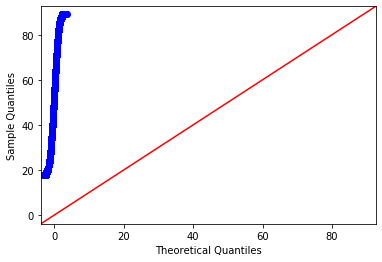

In [58]:
fig = sm.qqplot(df['Age'], line='45')
plt.show()

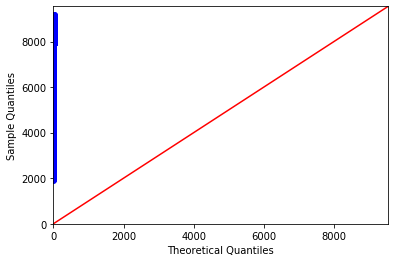

In [59]:
fig = sm.qqplot(df['TotalCharge'], line='45')
plt.show()

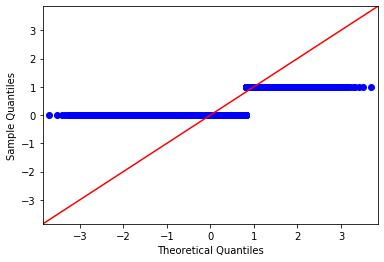

In [60]:
fig = sm.qqplot(df['Marital_Married'], line='45')
plt.show()

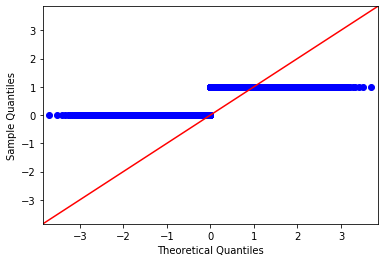

In [61]:
fig = sm.qqplot(df['Initial_admin_Emergency_Admission'], line='45')
plt.show()

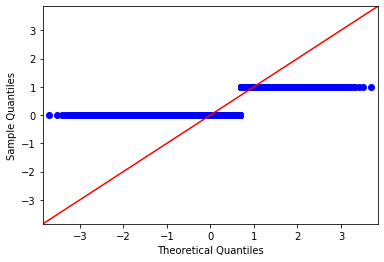

In [62]:
fig = sm.qqplot(df['Initial_admin_Observation_Admission'], line='45')
plt.show()

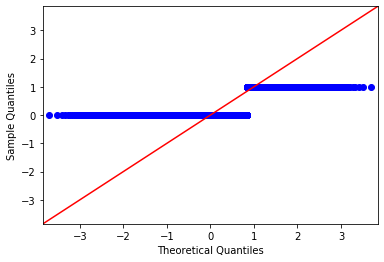

In [63]:
fig = sm.qqplot(df['Stroke_Yes'], line='45')
plt.show()

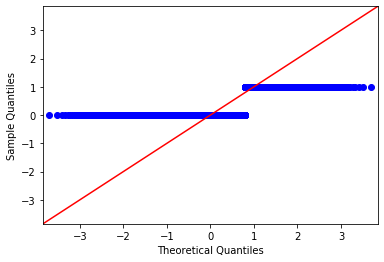

In [64]:
fig = sm.qqplot(df['Complication_risk_Low'], line='45')
plt.show()

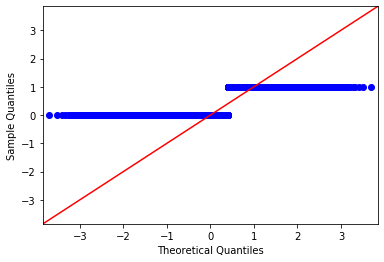

In [65]:
fig = sm.qqplot(df['Options_3'], line='45')
plt.show()

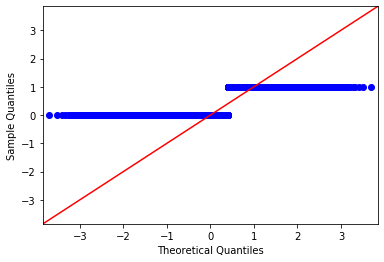

In [66]:
fig = sm.qqplot(df['Options_4'], line='45')
plt.show()

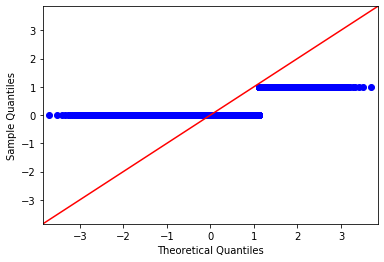

In [67]:
fig = sm.qqplot(df['Courteous_2'], line='45')
plt.show()

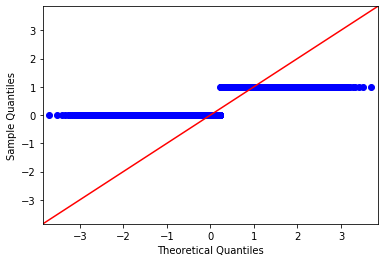

In [68]:
fig = sm.qqplot(df['HighBlood_Yes'], line='45')
plt.show()

## Multiple Regression Feature Reduction

## Variance Inflation Factor (VIF)
### Look for Multicollinearity between Independent variables 
### Code Reference (Zach, 2020)

In [69]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Additional_charges ~ Age+TotalCharge+Marital_Married+Initial_admin_Emergency_Admission+Initial_admin_Observation_Admission+HighBlood_Yes+Stroke_Yes+Complication_risk_Low+Options_3+Options_4+Courteous_2', data=df, return_type='dataframe')

In [70]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [71]:
vif

,VIF,variable
0,20.132471,Intercept
1,1.001660,Age
2,1.012415,TotalCharge
3,1.001234,Marital_Married
4,1.503821,Initial_admin_Emergency_Admission
5,1.493896,Initial_admin_Observation_Admission
6,1.002135,HighBlood_Yes
7,1.001448,Stroke_Yes
8,1.001558,Complication_risk_Low
9,1.378054,Options_3


## Feature selection, differing levels of correlation
## and corresponding R_Squared & Root Mean Square Error (RMSE)


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

## K Nearast Neighbors & correlation for feature selection 
## Code Reference (Feely, 2020), starting at 12:30 in video - going to minute 16:00

In [73]:
X=df[['Age','Marital_Married','Initial_admin_Emergency_Admission','Initial_admin_Observation_Admission','HighBlood_Yes','Stroke_Yes','Complication_risk_Low','Options_3','Options_4','Courteous_2']]
y = df.Additional_charges   

In [74]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 1395.79
R_squared: 0.95


In [75]:
vals = [0.02,0.05,0.08,0.1,0.2]
for val in vals:
    features = abs(df.corr()["Additional_charges"][abs(df.corr()["Additional_charges"])>val].drop('Additional_charges')).index.tolist()
    
    X = df.drop(columns='Additional_charges')
    X=X[features]
    
    print(features)

    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))

['Age', 'TotalCharge', 'Marital_Married', 'Doc_visits_7', 'Initial_admin_Emergency_Admission', 'Initial_admin_Observation_Admission', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Options_3', 'Options_4', 'Courteous_2']
RMSE: 1838.19
R_squared: 0.92
['Age', 'HighBlood_Yes']
RMSE: 408.78
R_squared: 1.0
['Age', 'HighBlood_Yes']
RMSE: 408.78
R_squared: 1.0
['Age', 'HighBlood_Yes']
RMSE: 408.78
R_squared: 1.0
['Age', 'HighBlood_Yes']
RMSE: 408.78
R_squared: 1.0


## OLS, Reduced Model With
###    Age (continuous independent feature)
###    HighBlood_Yes (catagorical independent feature)

In [76]:
X=df[['Age','HighBlood_Yes']]
y=df['Additional_charges']

In [77]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
X= sm.add_constant(X)

In [78]:
ols = sm.OLS(y, X).fit()

In [79]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 6.669e+04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:50:59   Log-Likelihood:                -81330.
No. Observations:                9206   AIC:                         1.627e+05
Df Residuals:                    9203   BIC:                         1.627e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2681.5619     50.211    -53.406

## Additional_charges = -2681.5619+Age(225.6544)+HighBlood_Yes(8647.7532)


# Fitted vs Residuals of model
### Code Reference (seaborn.residplot, n.d.)

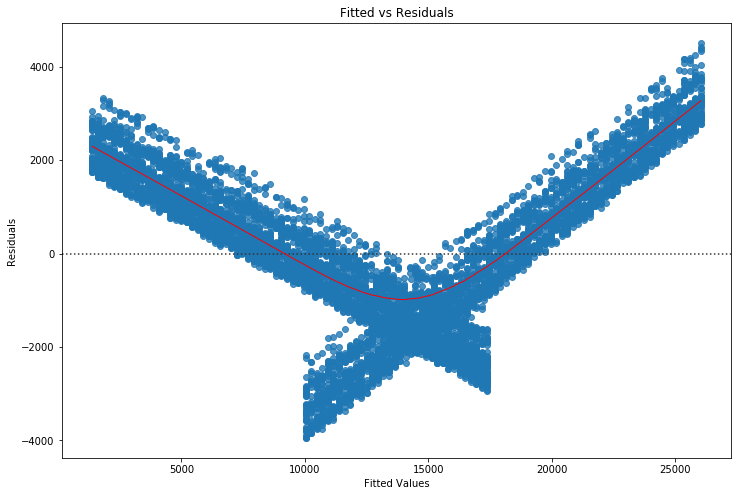

In [80]:

plt.figure(figsize=(12,8))
plt.title('Fitted vs Residuals')
sns.residplot(ols.fittedvalues,ols.resid,lowess=True,line_kws={'color':'r','lw':1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## QQ Plots, Independent Features

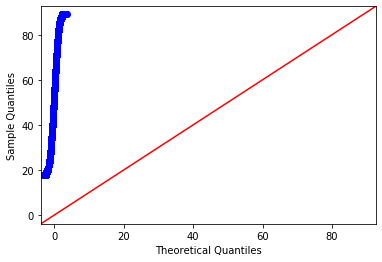

In [81]:
fig = sm.qqplot(df['Age'], line='45')
plt.show()

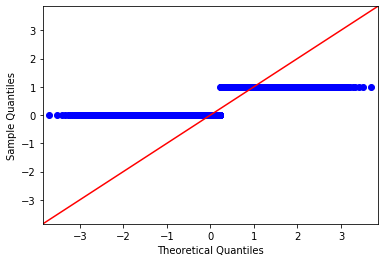

In [82]:
fig = sm.qqplot(df['HighBlood_Yes'], line='45')
plt.show()